In [24]:
# 导入必要库
import pandas as pd

# 设定文件路径（注意前面加 r 防止路径字符转义）
traffic_volume_path = r"D:\桌面\homework\ADS\Automated_Traffic_Volume_Counts_20250413.csv"
vehicle_collisions_path = r"D:\新建文件夹 (2)\Motor_Vehicle_Collisions_-_Crashes_20250413.csv"

# 读取CSV文件
traffic_volume_df = pd.read_csv(traffic_volume_path)
vehicle_collisions_df = pd.read_csv(vehicle_collisions_path)

# 查看数据行列数
print("📊 Traffic Volume 数据行列数:", traffic_volume_df.shape)
print("📊 Vehicle Collisions 数据行列数:", vehicle_collisions_df.shape)

# 查看前5行数据
print("\n📋 Traffic Volume 前5行:")
print(traffic_volume_df.head())

print("\n📋 Vehicle Collisions 前5行:")
print(vehicle_collisions_df.head())



📊 Traffic Volume 数据行列数: (109248, 14)
📊 Vehicle Collisions 数据行列数: (309495, 29)

📋 Traffic Volume 前5行:
   RequestID       Boro    Yr   M  D  HH  MM  Vol  SegmentID  \
0      36828  Manhattan  2023  11  1  18  30  353     146631   
1      36828  Manhattan  2023  11  1  18  45  330     146631   
2      36828  Manhattan  2023  11  1  19   0  345     146631   
3      36828  Manhattan  2023  11  1  19  15  338     146631   
4      36828  Manhattan  2023  11  1  19  30  321     146631   

                                         WktGeom                 street  \
0  POINT (1002754.5374999298 235875.81836194085)  MADISON AVENUE BRIDGE   
1  POINT (1002754.5374999298 235875.81836194085)  MADISON AVENUE BRIDGE   
2  POINT (1002754.5374999298 235875.81836194085)  MADISON AVENUE BRIDGE   
3  POINT (1002754.5374999298 235875.81836194085)  MADISON AVENUE BRIDGE   
4  POINT (1002754.5374999298 235875.81836194085)  MADISON AVENUE BRIDGE   

                   fromSt                    toSt Direction  
0

In [25]:

# 查看列名，方便后续操作
print("\n📌 Traffic Volume coloumns:")
print(traffic_volume_df.columns)

print("\n📌 Vehicle Collisions coloumns")
print(vehicle_collisions_df.columns)


📌 Traffic Volume coloumns:
Index(['RequestID', 'Boro', 'Yr', 'M', 'D', 'HH', 'MM', 'Vol', 'SegmentID',
       'WktGeom', 'street', 'fromSt', 'toSt', 'Direction'],
      dtype='object')

📌 Vehicle Collisions coloumns
Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [26]:
import pandas as pd

traffic_volume_path = r"D:\桌面\homework\ADS\Automated_Traffic_Volume_Counts_20250413.csv"
vehicle_collisions_path = r"D:\新建文件夹 (2)\Motor_Vehicle_Collisions_-_Crashes_20250413.csv"

traffic_volume_df = pd.read_csv(traffic_volume_path)
vehicle_collisions_df = pd.read_csv(vehicle_collisions_path)

traffic_volume_df.rename(columns={'Yr': 'year', 'M': 'month', 'D': 'day'}, inplace=True)
traffic_volume_df['date'] = pd.to_datetime(traffic_volume_df[['year', 'month', 'day']])

print(traffic_volume_df[['year', 'month', 'day', 'date']].head())


   year  month  day       date
0  2023     11    1 2023-11-01
1  2023     11    1 2023-11-01
2  2023     11    1 2023-11-01
3  2023     11    1 2023-11-01
4  2023     11    1 2023-11-01


In [27]:
vehicle_collisions_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

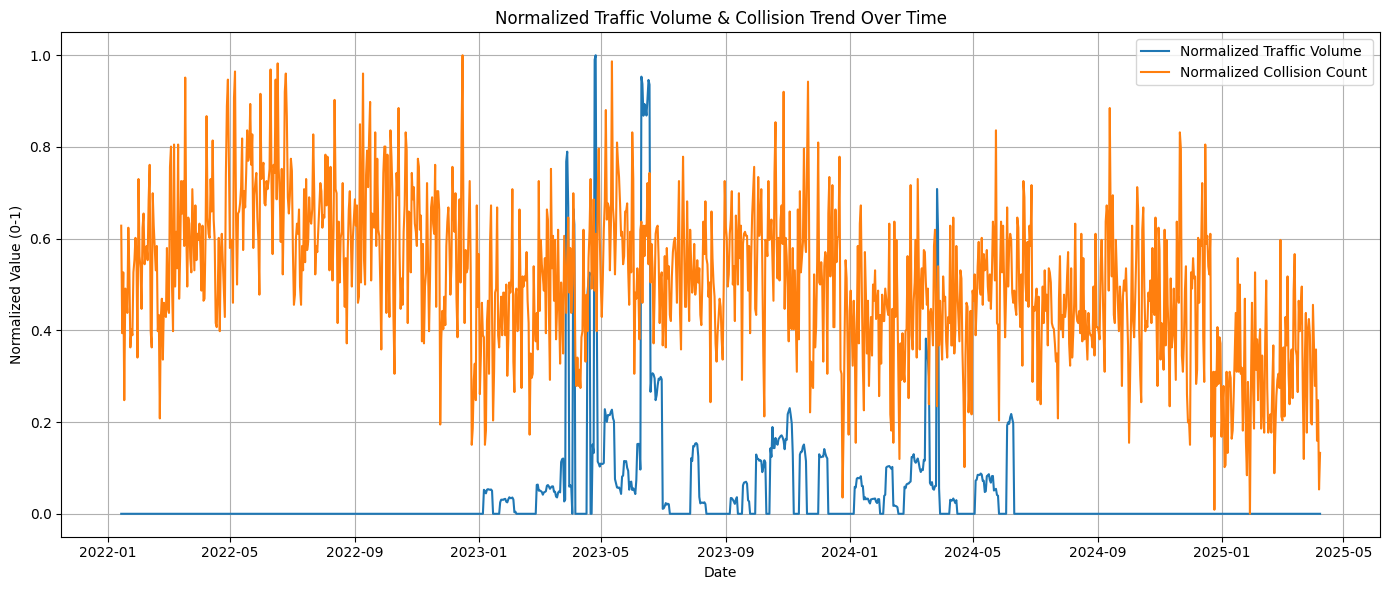

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 读入数据
traffic_volume_path = r"D:\桌面\homework\ADS\Automated_Traffic_Volume_Counts_20250413.csv"
vehicle_collisions_path = r"D:\新建文件夹 (2)\Motor_Vehicle_Collisions_-_Crashes_20250413.csv"

traffic_volume_df = pd.read_csv(traffic_volume_path)
vehicle_collisions_df = pd.read_csv(vehicle_collisions_path)

# 确保日期格式
traffic_volume_df = traffic_volume_df.rename(columns={'Yr': 'year', 'M': 'month', 'D': 'day'})
traffic_volume_df['date'] = pd.to_datetime(traffic_volume_df[['year', 'month', 'day']])

vehicle_collisions_df['CRASH DATE'] = pd.to_datetime(vehicle_collisions_df['CRASH DATE'], errors='coerce')

# 按日期统计交通量 & 碰撞次数
traffic_daily_volume = traffic_volume_df.groupby('date')['Vol'].sum().reset_index()
traffic_daily_volume.columns = ['date', 'total_volume']

collision_daily_count = vehicle_collisions_df.groupby('CRASH DATE').size().reset_index(name='collision_count')
collision_daily_count.columns = ['date', 'collision_count']

# 合并两者
combined_df = pd.merge(traffic_daily_volume, collision_daily_count, on='date', how='outer').sort_values('date')

# 缺失值填 0
combined_df[['total_volume', 'collision_count']] = combined_df[['total_volume', 'collision_count']].fillna(0)

# 👉 标准化两列
scaler = MinMaxScaler()
combined_df[['volume_norm', 'collision_norm']] = scaler.fit_transform(combined_df[['total_volume', 'collision_count']])

# 📊 画标准化后的折线图
plt.figure(figsize=(14,6))
sns.lineplot(data=combined_df, x='date', y='volume_norm', label='Normalized Traffic Volume')
sns.lineplot(data=combined_df, x='date', y='collision_norm', label='Normalized Collision Count')
plt.title('Normalized Traffic Volume & Collision Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value (0-1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import contextily as cx

# 读入数据
traffic_volume_path = r"D:\桌面\homework\ADS\Automated_Traffic_Volume_Counts_20250413.csv"
traffic_volume_df = pd.read_csv(traffic_volume_path)

# 将 WktGeom 字段转成 geometry
traffic_volume_df['geometry'] = traffic_volume_df['WktGeom'].apply(wkt.loads)
traffic_gdf = gpd.GeoDataFrame(traffic_volume_df, geometry='geometry', crs="EPSG:2263")  # NY常用投影

# 转换成 WGS84 经纬度（如果用 web 地图或者 contextily）
traffic_gdf = traffic_gdf.to_crs(epsg=3857)

# 提取坐标
coords = list(zip(traffic_gdf.geometry.x, traffic_gdf.geometry.y))

# DBSCAN 聚类
db = DBSCAN(eps=300, min_samples=5).fit(coords)  # eps距离阈值根据投影单位调整
traffic_gdf['cluster'] = db.labels_

# 可视化
fig, ax = plt.subplots(figsize=(12, 10))
traffic_gdf.plot(ax=ax, column='cluster', cmap='Set1', legend=True, markersize=30)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title('Traffic Volume Locations DBSCAN Cluster')
plt.axis('off')
plt.show()


In [ ]:
!pip install contextily


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### spatial analysis about corr

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# 读入数据
traffic_volume_df = pd.read_csv(r"D:\桌面\homework\ADS\Automated_Traffic_Volume_Counts_20250413.csv")
vehicle_collisions_df = pd.read_csv(r"D:\新建文件夹 (2)\Motor_Vehicle_Collisions_-_Crashes_20250413.csv")

# 日期列处理
traffic_volume_df = traffic_volume_df.rename(columns={'Yr': 'year', 'M': 'month', 'D': 'day'})
traffic_volume_df['date'] = pd.to_datetime(traffic_volume_df[['year', 'month', 'day']])
vehicle_collisions_df['CRASH_DATE'] = pd.to_datetime(vehicle_collisions_df['CRASH DATE'], errors='coerce')

# 坐标转 geometry（流量监测点）
traffic_volume_df['geometry'] = traffic_volume_df['WktGeom'].apply(wkt.loads)
traffic_gdf = gpd.GeoDataFrame(traffic_volume_df, geometry='geometry', crs='EPSG:2263')  # NY State Plane坐标系

# 碰撞点 geometry
vehicle_collisions_df = vehicle_collisions_df.dropna(subset=['LATITUDE', 'LONGITUDE'])
collision_gdf = gpd.GeoDataFrame(
    vehicle_collisions_df,
    geometry=gpd.points_from_xy(vehicle_collisions_df['LONGITUDE'], vehicle_collisions_df['LATITUDE']),
    crs='EPSG:4326'  # WGS84
).to_crs('EPSG:2263')


In [ ]:
print(traffic_volume_df.shape)
print(vehicle_collisions_df.shape)


(109248, 16)
(286135, 30)


In [ ]:
import geopandas as gpd
import pandas as pd

# 假设你之前的数据是这两个
# traffic_gdf = gpd.read_file("traffic.geojson")
# collision_gdf = gpd.read_file("collision.geojson")

# 1. 缓冲区，单位看你的数据坐标系，100 meters 示例
traffic_gdf['buffer'] = traffic_gdf.geometry.buffer(100)
traffic_buffer_gdf = traffic_gdf.set_geometry('buffer')

# 2. 只保留重叠区域，裁剪交通缓冲区在碰撞点范围内的部分
traffic_buffer_gdf = traffic_buffer_gdf.cx[
    collision_gdf.total_bounds[0]:collision_gdf.total_bounds[2],
    collision_gdf.total_bounds[1]:collision_gdf.total_bounds[3]
]

# 3. 分块空间连接
result_list = []
chunk_size = 1000  # 每块 1000 个碰撞点，保证内存能承受

for i in range(0, len(collision_gdf), chunk_size):
    collision_chunk = collision_gdf.iloc[i:i+chunk_size]
    join_chunk = gpd.sjoin(
        collision_chunk, 
        traffic_buffer_gdf, 
        how='inner', 
        predicate='within'
    )
    result_list.append(join_chunk)

# 4. 拼接所有分块结果
join_gdf = pd.concat(result_list, ignore_index=True)

# 5. 按 RequestID 和 CRASH_DATE 汇总碰撞次数
collision_count_nearby = join_gdf.groupby(
    ['RequestID', 'CRASH_DATE']
).size().reset_index(name='nearby_collision_count')

# 6. 查看结果
print(collision_count_nearby.head())


   RequestID CRASH_DATE  nearby_collision_count
0      35707 2022-02-25                     288
1      35707 2022-10-30                     288
2      35707 2022-12-05                     864
3      35707 2022-12-24                     288
4      35707 2023-03-03                     288


In [ ]:
# 假如 traffic_gdf 是你之前读入的交通流量点数据表，有 RequestID, date 和 Vol 三列
volume_count = traffic_gdf[['RequestID', 'date', 'Vol']].copy()

# 确保没有缺失值
volume_count = volume_count.dropna(subset=['Vol'])

# 查看一下
print(volume_count)


        RequestID       date  Vol
0           36828 2023-11-01  353
1           36828 2023-11-01  330
2           36828 2023-11-01  345
3           36828 2023-11-01  338
4           36828 2023-11-01  321
...           ...        ...  ...
109243      37261 2024-02-12   85
109244      37261 2024-02-12   81
109245      37261 2024-02-12   62
109246      37261 2024-02-12   59
109247      37261 2024-02-12   73

[109248 rows x 3 columns]


In [ ]:
import pandas as pd
from tqdm import tqdm

# 合并流量和周边碰撞数
merged_df = pd.merge(
    volume_count, 
    collision_count_nearby, 
    left_on=['RequestID', 'date'], 
    right_on=['RequestID', 'CRASH_DATE'], 
    how='inner'
)

# 去掉可能有缺失值的行
merged_df = merged_df.dropna(subset=['Vol', 'nearby_collision_count'])

# 查看合并后的表头确认
print(merged_df)

# 定义一个函数，安全计算相关系数，避免空组或单行组出错
def safe_corr(df):
    if len(df) < 2:
        return None  # 或 0, 或 np.nan，看你需求
    return df[['Vol', 'nearby_collision_count']].corr().iloc[0,1]

# 按 RequestID 分组计算相关性
correlations = merged_df.groupby('RequestID').apply(safe_corr).reset_index()
correlations.columns = ['RequestID', 'correlation']

# 去掉空值行
correlations = correlations.dropna()

# 按相关性排序
correlations = correlations.sort_values('correlation', ascending=False)




      RequestID       date  Vol CRASH_DATE  nearby_collision_count
0         36070 2023-04-24  316 2023-04-24                     384
1         36070 2023-04-24  344 2023-04-24                     384
2         36070 2023-04-24  323 2023-04-24                     384
3         36070 2023-04-24  331 2023-04-24                     384
4         36070 2023-04-24  310 2023-04-24                     384
...         ...        ...  ...        ...                     ...
3643      36741 2024-03-09    8 2024-03-09                      96
3644      36741 2024-03-09   11 2024-03-09                      96
3645      36741 2024-03-09    3 2024-03-09                      96
3646      36741 2024-03-09    6 2024-03-09                      96
3647      36741 2024-03-09    3 2024-03-09                      96

[3648 rows x 5 columns]


C:\Users\12292\AppData\Local\Temp\ipykernel_31708\3034979703.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = merged_df.groupby('RequestID').apply(safe_corr).reset_index()


In [ ]:
correlations

,RequestID,correlation
2,36179,-0.644537
3,36190,-0.680334


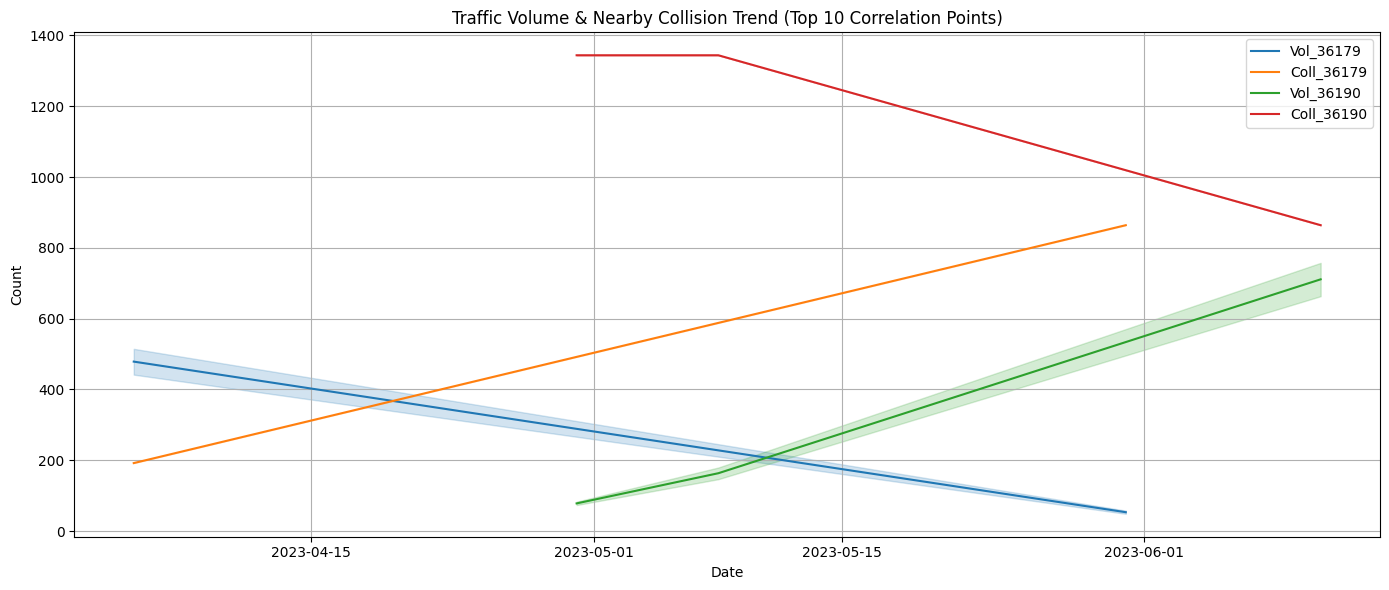

In [ ]:
# 取前10强相关性监测点
top_points = correlations.sort_values('correlation', ascending=False).head(10)['RequestID']

plt.figure(figsize=(14,6))
for rid in top_points:
    subset = merged_df[merged_df['RequestID'] == rid]
    sns.lineplot(data=subset, x='date', y='Vol', label=f'Vol_{rid}')
    sns.lineplot(data=subset, x='date', y='nearby_collision_count', label=f'Coll_{rid}')

plt.title('Traffic Volume & Nearby Collision Trend (Top 10 Correlation Points)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
